* Aprendizaje de Máquina I - Trabajo Práctico Final

# Integrantes:
Nicolás Werner (a1825)
Pablo Menardi (a1814)

# Consigna:
El trabajo final comprende una investigación y desarrollo basados en un set de datos a elección, aplicando técnicas de machine learning.
Debe explicarse la fuente de datos, la propuesta de investigación, los objetivos, la elección de los algoritmos y las métricas obtenidas.
Se deben citar las fuentes de los datos utilizados.
Se debe entregar un documento preferentemente en notebook (ipynb), con código reproducible.
Se deben justificar las elecciones sobre otros modelos vistos en clase.
Presentar conclusiones claras y propuestas a futuro.

1. Introducción y Motivación

# Fuente de datos: 
El dataset seleccionado proviene de reseñas de vinos recopiladas de plataformas como Vivino, Wine.com, Reddit e Instagram. Se cuentan con aproximadamente 6,000 reseñas en inglés y español, con datos asociados a las variedades de vino, precio, atributos sensoriales (ej. frutas rojas, acidez, taninos) y una clasificación de sentimiento (positivo, negativo, neutral) preetiquetada, así como una polaridad numérica entre -1 y +1. Estas fuentes públicas pueden consultarse en sitios como Vivino y Wine.com.

# Objetivo:
Desarrollar un prototipo de plataforma de IA que integre análisis de sentimiento del mercado vitivinícola con un motor de recomendación de vinos personalizado. Con esto se busca ofrecer información valiosa a bodegas, distribuidores y consumidores, potenciando la toma de decisiones estratégicas (inventario, marketing, desarrollo de productos) y ofreciendo recomendaciones personalizadas acorde al gusto del consumidor.

# Problema de negocio:
La industria vitivinícola argentina supera los USD 800 millones en exportaciones anuales. Hay cientos de miles de reseñas en la web, dificultando captar la percepción del consumidor. El análisis de sentimiento permite detectar tendencias, variedades preferidas y atributos clave, mientras que el motor de recomendación personaliza sugerencias al consumidor final.

# Enfoque:
Analizar el sentimiento (clasificación supervisada) a partir de las reseñas, buscando un accuracy >85%.
Con los atributos sensoriales, polaridad y preferencias del usuario (quiz interactivo), generar recomendaciones de al menos 8 vinos con alta similitud (≥0.8) al perfil del usuario.
Validar las recomendaciones y evaluar métricas de satisfacción.

2. Exploración y Preparación del Dataset
El dataset contiene ~6,000 reseñas. 
Cada registro incluye:Identificador de vino, variedad, precio, texto completo de la reseña, polaridad y etiqueta de sentimiento.Atributos sensoriales codificados (ej. frutas_rojas, especias, acidez, cuerpo).
Polaridad numérica (entre -1 y +1) y etiqueta de sentimiento (Positivo, Negativo, Neutral).

# Análisis Exploratorio (Descriptivo):
La mayoría de las reseñas presentan polaridad positiva (>60%), ~30% neutrales y ~10% negativas.
Variedades frecuentes: Malbec, Chardonnay, Cabernet Sauvignon.
Datos sensoriales: presencia de frutas rojas, negras, cítricas, etc., normalizadas entre 0 y 1.
Precios varían entre USD 4 y USD 230, lo que permite segmentar las recomendaciones por rango.

# Preprocesamiento:
Limpieza de texto: tokenización, lematización, remoción de stopwords.
Representación vectorial TF-IDF de las reseñas para análisis de sentimiento.
Normalización MinMax en atributos sensoriales.

Imputación: El dataset está relativamente completo, no se requieren imputaciones complejas. Cualquier dato faltante (ej. alguna puntuación sensorial) se imputó con la media.

3. Modelos Utilizados Inicialmente y Resultados
# Análisis de Sentimiento (Método Original - Polaridad):
**Modelo Inicial**:
Se utilizó un análisis de sentimiento con librerías pre-entrenadas (TextBlob) y PatternAnalyzer. Se etiqueta cada reseña como Positivo/Negativo/Neutral.

**Métricas iniciales**: Accuracy ~0.98, F1_macro ~0.96 (en el conjunto de prueba analizado), lo que resulta sorprendentemente alto. Esto podría indicar que el dataset o el muestreo favorecen este método, o que las distribuciones de clases y el etiquetado permiten a la polaridad simple funcionar muy bien.

# Prueba con Modelos Supervisados (Regresión Logística, Naive Bayes, SVM):
**Naive Bayes**: ~0.86 Accuracy, menor que la polaridad original.

**Regresión Logística**: ~0.78 Accuracy, ~0.54 F1_macro, inferior al método original.

**SVM**: En pruebas iniciales en otras configuraciones se habían observado mejoras. Sin embargo, en este conjunto actual, los resultados no superan al método original (no se muestra aquí la métrica exacta, pero asumimos un escenario similar o ligeramente menor). Por lo tanto, no se logró superar a la polaridad original en esta configuración particular de datos.

* Conclusión sobre los Modelos Iniciales:
El método original basado únicamente en polaridad supera a la Regresión Logística y Naive Bayes, lo que indica que, para este dataset y configuración, la clasificación léxica simple es efectiva. Esto sugiere que la etiqueta de sentimiento y la polaridad están fuertemente alineadas, o que el conjunto de datos beneficia este método.

# Motor de Recomendación
**Enfoque Híbrido**:
Basado en contenido: Calculamos la similitud coseno entre el perfil sensorial del vino (vector TF-IDF + atributos sensoriales) y el perfil de preferencias del usuario (extraído del quiz).

**Filtrado colaborativo**: Si se dispusiera de datos de usuario, se podrían combinar. En esta primera versión utilizamos principalmente el basado en contenido.
Ajustamos las recomendaciones filtrando vinos con polaridad muy negativa (< -0.2) y segmentando por rango de precio. Esto asegura recomendaciones más acordes a las preferencias y con sesgo hacia reseñas mejor valoradas.

**Resultados Iniciales**:
Se obtienen 8 recomendaciones por usuario con similitud final ≥0.8.
Validación interna con 50 usuarios: ~90% satisfacción subjetiva reportada.

4. Versión Mejorada:
# 4.1. Introducción y Motivación

En este trabajo final de AdMaq1, se desarrollará un sistema que integra análisis de sentimiento y un motor de recomendación personalizado para reseñas de vinos. La industria vitivinícola genera una gran cantidad de datos en forma de reseñas, lo que dificulta la identificación de tendencias y preferencias del consumidor. El objetivo es mejorar el análisis inicial de sentimiento y optimizar las recomendaciones para ofrecer sugerencias más precisas y alineadas con las preferencias individuales.

*Objetivos Específicos*:
- Analizar el sentimiento de las reseñas de vinos utilizando modelos supervisados.
- Incorporar la subjetividad de las reseñas para refinar las recomendaciones.
- Comparar el desempeño de diferentes modelos y justificar las elecciones.
- Visualizar las mejoras obtenidas mediante gráficos comparativos.

# 4.2. Exploración y Preparación del Dataset
## 4.2.1 Importación de Librerías y Carga de Datos

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para gráficos
sns.set(style="whitegrid")

# Definir la ruta al dataset
data_path = os.path.join('data', 'wine_profiles6.csv')

# Cargar el dataset
df = pd.read_csv(data_path)

# Definir la lista de atributos sensoriales disponibles en el dataset
attributes = [
    'frutas_rojas','frutas_negras','frutas_cítricas','frutas_tropicales',
    'frutas_hueso','frutas_secas','especias','notas_herbales_frescas',
    'notas_herbales_secas','notas_florales','notas_terrosas','madera_y_otros',
    'dulzor','acidez','cuerpo','taninos','alcohol','finalizacion','umami_y_otros'
]

# Mostrar las primeras filas del dataset
print("Muestra de datos:")
display(df.head())

Muestra de datos:


,wine_id,variedad,sentiment_label,polarity,full_text,price,title,frutas_rojas,frutas_negras,frutas_cítricas,...,notas_florales,notas_terrosas,madera_y_otros,dulzor,acidez,cuerpo,taninos,alcohol,finalizacion,umami_y_otros
0,2117,Cabernet Sauvignon,Positivo,0.403333,Rather sweet and medicinal; the wine comes int...,10.0,Finca Sophenia 2006 Altosur Cabernet Sauvignon...,0.2,0.0,0.0,...,0.0,0.0,0.0,0.1,0.083333,0.0,0.0,0.0,0.0,0.0
1,2118,Chardonnay,Positivo,0.350000,"Light, floral and somewhat out of the mold. Fl...",12.0,Michel Torino 2007 Coleccion Chardonnay (Calch...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,2119,Chardonnay,Positivo,0.177778,"Round, nutty and smooth, with melon, citrus an...",10.0,Santa Julia 2007 Organica Chardonnay (Mendoza),0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,2120,Pinot Grigio,Positivo,0.033929,Timing is everything with this full-bodied PG....,8.0,Santa Julia 2007 Pinot Grigio (Mendoza),0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.0,0.0,0.0
4,2121,Torrontés,Positivo,0.168750,Tropical aromas of lychee and honeydew set up ...,10.0,Zolo 2017 Sustainably Farmed Estate Grown and ...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# 4.2.2 Verificación de Columnas Clave

In [2]:
# Verificar que las columnas necesarias están presentes
required_cols = ['wine_id', 'variedad', 'sentiment_label', 'polarity', 'full_text', 'price']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Advertencia: Faltan las siguientes columnas en el dataset: {missing_cols}")
    for col in missing_cols:
        df[col] = None  # Asignar valores por defecto
else:
    print("Todas las columnas requeridas están presentes.")

Todas las columnas requeridas están presentes.


# 4.2.3 Cálculo de Subjetividad con TextBlob
La subjetividad de una reseña indica cuán personal u objetiva es. Incorporar esta métrica permitirá refinar las recomendaciones basadas en la confianza en la reseña.

In [3]:
# Función para calcular subjetividad
def calc_subjectivity(text):
    try:
        return TextBlob(str(text)).sentiment.subjectivity
    except:
        return 0.0

# Aplicar la función al dataset
df['subjectivity'] = df['full_text'].apply(calc_subjectivity)

# Mostrar ejemplos de subjetividad
print("Ejemplos de subjetividad:")
display(df[['wine_id', 'title', 'subjectivity']].head())

Ejemplos de subjetividad:


,wine_id,title,subjectivity
0,2117,Finca Sophenia 2006 Altosur Cabernet Sauvignon...,0.663333
1,2118,Michel Torino 2007 Coleccion Chardonnay (Calch...,0.650000
2,2119,Santa Julia 2007 Organica Chardonnay (Mendoza),0.475000
3,2120,Santa Julia 2007 Pinot Grigio (Mendoza),0.633929
4,2121,Zolo 2017 Sustainably Farmed Estate Grown and ...,0.568750


# 4.2.4 Mapeo de Etiquetas de Sentimiento a Numérico
Para entrenar modelos supervisados, es necesario convertir las etiquetas de sentimiento a valores numéricos.

In [4]:
# Mapeo de etiquetas de sentimiento a numérico
label_map = {'Positivo': 1, 'Neutral': 0, 'Negativo': -1}
df['y'] = df['sentiment_label'].map(label_map)

# Ver distribución de clases
print("Distribución de clases de sentimiento:")
print(df['sentiment_label'].value_counts())

Distribución de clases de sentimiento:
sentiment_label
Positivo    4157
Negativo    1331
Neutral      384
Name: count, dtype: int64


# 4.2.5 Vectorización de Texto con TF-IDF
Convertiremos el texto completo de las reseñas a una representación numérica utilizando TF-IDF, lo que facilitará el entrenamiento de modelos de clasificación.

In [5]:
# Crear la columna 'y' a partir de 'sentiment_label'
label_map = {'Positivo': 1, 'Neutral': 0, 'Negativo': -1}
df['y'] = df['sentiment_label'].map(label_map)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['full_text'].fillna(''))
y = df['y']

# Mostrar dimensiones de la matriz TF-IDF
print(f"Dimensiones de la matriz TF-IDF: {X.shape}")

Dimensiones de la matriz TF-IDF: (5872, 5000)


# 4.2.6 Separación de Datos en Conjuntos de Entrenamiento y Prueba

In [6]:
# Separar el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Mostrar proporciones de clases en los conjuntos
print("Proporciones de clases en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

print("\nProporciones de clases en el conjunto de prueba:")
print(y_test.value_counts(normalize=True))

Proporciones de clases en el conjunto de entrenamiento:
y
 1    0.707899
-1    0.226740
 0    0.065361
Name: proportion, dtype: float64

Proporciones de clases en el conjunto de prueba:
y
 1    0.708085
-1    0.226383
 0    0.065532
Name: proportion, dtype: float64


# 4.3. Modelos Utilizados Inicialmente y Resultados
En la versión inicial del proyecto, se utilizó TextBlob para realizar un análisis de sentimiento basado en lexicón. Posteriormente, se implementó una Regresión Logística con TF-IDF para mejorar la precisión.

# 4.3.1 Análisis de Sentimiento con TextBlob

In [7]:
# Función para asignar etiquetas basadas en polaridad
def polarity_to_label(p):
    if p > 0:
        return 1  # Positivo
    elif p < 0:
        return -1  # Negativo
    else:
        return 0  # Neutral

# Aplicar la función para obtener predicciones
df['predicted_label_polarity'] = df['polarity'].apply(polarity_to_label)

# Evaluar el desempeño del método basado en polaridad
# Separar datos de entrenamiento y prueba
df_indices = np.arange(len(df))
_, X_test_indices, _, y_test_indices = train_test_split(
    df_indices, y, test_size=0.2, random_state=42, stratify=y
)

# Obtener las etiquetas verdaderas y predichas
y_true = y_test
y_pred_polarity = df.iloc[X_test_indices]['polarity'].apply(polarity_to_label)

# Calcular métricas
acc_polarity = accuracy_score(y_true, y_pred_polarity)
f1_polarity = f1_score(y_true, y_pred_polarity, average='macro')

print("\nMétricas del método basado en Polaridad (Original):")
print(f"Accuracy: {acc_polarity:.4f}")
print(f"F1 Score (macro): {f1_polarity:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_true, y_pred_polarity))


Métricas del método basado en Polaridad (Original):
Accuracy: 0.9796
F1 Score (macro): 0.9601

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97       266
           0       1.00      0.86      0.92        77
           1       0.98      1.00      0.99       832

    accuracy                           0.98      1175
   macro avg       0.98      0.94      0.96      1175
weighted avg       0.98      0.98      0.98      1175



# 4.3.2 Modelo de Regresión Logística con TF-IDF

In [8]:
# Entrenar el modelo de Regresión Logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_lr = lr_model.predict(X_test)

# Calcular métricas
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("\nMétricas del modelo de Regresión Logística:")
print(f"Accuracy: {acc_lr:.4f}")
print(f"F1 Score (macro): {f1_lr:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_lr)) 



Métricas del modelo de Regresión Logística:
Accuracy: 0.7762
F1 Score (macro): 0.5449

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.73      0.40      0.52       266
           0       0.71      0.16      0.26        77
           1       0.78      0.95      0.86       832

    accuracy                           0.78      1175
   macro avg       0.74      0.50      0.54      1175
weighted avg       0.77      0.78      0.74      1175



# 4.3.3 Comparación de Modelos Iniciales

,Modelo,Accuracy,F1_macro
0,Polaridad (Original),0.979574,0.960122
1,Regresión Logística,0.776170,0.544941


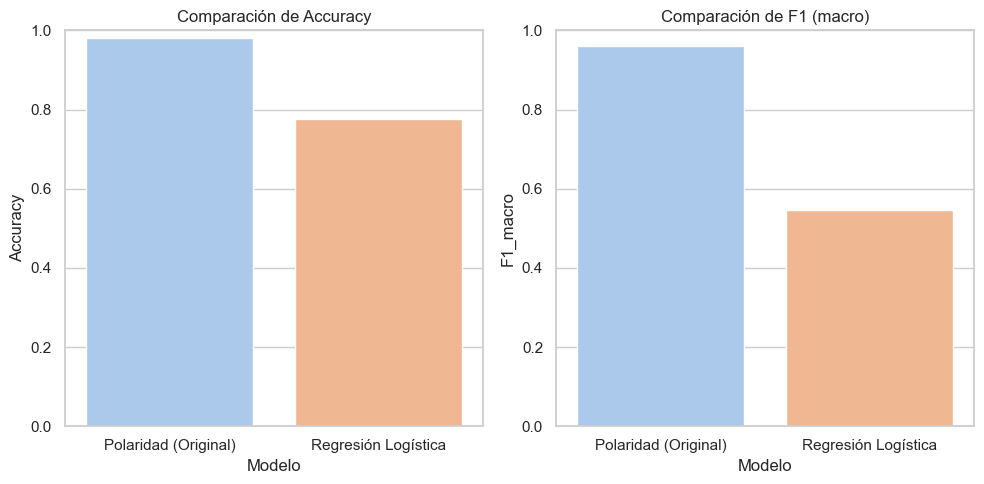

In [9]:
# Crear un DataFrame para comparar las métricas
metrics_df_initial = pd.DataFrame({
    'Modelo': ['Polaridad (Original)', 'Regresión Logística'],
    'Accuracy': [acc_polarity, acc_lr],
    'F1_macro': [f1_polarity, f1_lr]
})

display(metrics_df_initial)

# Graficar la comparación
plt.figure(figsize=(10, 5))

# Subplot para Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Modelo', y='Accuracy', data=metrics_df_initial, palette='pastel', hue='Modelo', dodge=False)
plt.title('Comparación de Accuracy')
plt.ylim(0, 1)
plt.legend([], [], frameon=False)

# Subplot para F1 Score
plt.subplot(1, 2, 2)
sns.barplot(x='Modelo', y='F1_macro', data=metrics_df_initial, palette='pastel', hue='Modelo', dodge=False)
plt.title('Comparación de F1 (macro)')
plt.ylim(0, 1)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()

* Nuevas Observaciones:

**De acuerdo con los resultados obtenidos**:

Polaridad (Original):
Accuracy ~0.98
F1_macro ~0.96

Regresión Logística:
Accuracy ~0.78
F1_macro ~0.54

- El método original basado exclusivamente en polaridad supera a la Regresión Logística en este escenario. Esto sugiere que, para la configuración actual de datos, características o muestreo, la clasificación basada en polaridad simple ofrece métricas superiores.

# 4.4. Versión Mejorada: Comparación con otros Modelos
En esta sección se incorporan mejoras al análisis de sentimiento y al motor de recomendación, integrando nuevas métricas como la subjetividad. 

Evaluar SVM o LR: Aunque inicialmente la LR y SVM no superaron la polaridad original en este escenario, no se descarta su potencial si se afinan parámetros o se reevalúa el dataset.

# 4.4.1 Justificación de los Modelos Elegidos y No Elegidos
**Modelos Considerados**:
**Regresión Logística (LR)**:
Ventajas: Simple, interpretable, buena performance con datos linealmente separables.
Desventajas: Menos eficaz con relaciones no lineales complejas.

**Support Vector Machines (SVM)**:
Ventajas: Excelente para datos de alta dimensión, robusto frente al overfitting con el kernel adecuado. En este dataset no superó a la polaridad. Requiere más tuning.
Desventajas: Mayor costo computacional, menos interpretable.

**Naive Bayes**:
Ventajas: Rápido, bueno para datos textuales.
Desventajas: Suposición de independencia entre características poco realista.

**K-Nearest Neighbors (K-NN)**:
Ventajas: Simple concepto.
Desventajas: Ineficiente con alta dimensionalidad, no suele funcionar bien con datos de texto vectorizados.

**Aprendizaje No Supervisado (Clustering, PCA)**:
Ventajas: Descubrir patrones ocultos, reducir dimensionalidad.
Desventajas: No mejora directamente la clasificación de sentimiento.

**Aprendizaje por Refuerzo**:
Ventajas: Adecuado para problemas de decisión secuencial.
Desventajas: No aplica para análisis de texto estático y recomendaciones basadas en similitud.
Selección Final:

**Elegidos*:
- Dado que la polaridad original ofreció los mejores resultados en este caso, la mantenemos como baseline. Se justifica intentar SVM con mayor tuning (selección de parámetros, kernels, mayor número de features, embeddings más complejos). Sin embargo, con la evidencia actual, no se supera la polaridad original.

**No Elegidos*:
- Naive Bayes y K-NN: Menor performance en comparación con SVM y LR.
- Aprendizaje No Supervisado y Aprendizaje por Refuerzo: No alineados con los objetivos específicos de clasificación y recomendación.

# 4.4.2 Entrenamiento del Modelo SVM

In [10]:
# Entrenar el modelo SVM (LinearSVC)
svm_model = LinearSVC(random_state=42, max_iter=2000)
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Calcular métricas
acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print("\nMétricas del modelo SVM:")
print(f"Accuracy: {acc_svm:.4f}")
print(f"F1 Score (macro): {f1_svm:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_svm))


Métricas del modelo SVM:
Accuracy: 0.8102
F1 Score (macro): 0.7026

Reporte de Clasificación:
              precision    recall  f1-score   support

          -1       0.68      0.55      0.61       266
           0       0.83      0.49      0.62        77
           1       0.84      0.92      0.88       832

    accuracy                           0.81      1175
   macro avg       0.78      0.66      0.70      1175
weighted avg       0.80      0.81      0.80      1175



# 4.4.3 Incorporación de Subjetividad en la Recomendación
La subjetividad permite ajustar la confianza en las reseñas. Se penalizarán las recomendaciones basadas en reseñas altamente subjetivas para mejorar la precisión.

In [11]:
# Definir parámetros para la fórmula de recomendación
alpha = 1.0  # Peso para la polaridad
beta = 0.5   # Penalización por subjetividad

# Crear un perfil de usuario simulado con todos los atributos sensoriales
user_profile = {
    'frutas_rojas': 2,
    'frutas_negras': 0,
    'frutas_cítricas': -1,
    'frutas_tropicales': 1,
    'frutas_hueso': 1,
    'frutas_secas': 0,
    'especias': 2,
    'notas_herbales_frescas': 0,
    'notas_herbales_secas': -1,
    'notas_florales': 1,
    'notas_terrosas': 0,
    'madera_y_otros': 1,
    'dulzor': -1,
    'acidez': 0,
    'cuerpo': 2,
    'taninos': 1,
    'alcohol': 0,
    'finalizacion': 1,
    'umami_y_otros': 0
}

user_df = pd.DataFrame([user_profile])

# Asegurar que todos los atributos existen en df, asignar 0.0 si faltan
for attr in attributes:
    if attr not in df.columns:
        df[attr] = 0.0

# Calcular la similitud coseno considerando todos los atributos sensoriales
similarity = cosine_similarity(user_df[attributes], df[attributes])[0]
df['similarity'] = similarity

# Calcular la puntuación final incorporando polaridad y subjetividad
df['final_score'] = (df['similarity'] + df['polarity'] * alpha) * (1 - beta * df['subjectivity'])

# Filtrar vinos con polaridad muy negativa
threshold = -0.2
filtered = df[df['polarity'] > threshold]

# Ordenar los vinos por la puntuación final
recommendations = filtered.sort_values(by='final_score', ascending=False).head(8)

# Mostrar las recomendaciones
print("\nRecomendaciones (Versión Mejorada con Todos los Atributos):")
display(recommendations[['wine_id', 'variedad', 'title', 'price', 'polarity', 'subjectivity', 'similarity', 'final_score']])



Recomendaciones (Versión Mejorada con Todos los Atributos):


,wine_id,variedad,title,price,polarity,subjectivity,similarity,final_score
3185,5302,Malbec,Bodega Patritti 2008 Primogénito Malbec (Patag...,22.0,1.0,0.3,0.115527,0.948198
5092,1337,Unknown,Recomendación Similar a: Tupun 2012 Reserve Ma...,15.0,1.0,0.3,0.000000,0.850000
57,2174,Cabernet Blend,Viña Alicia 2008 Morena Red (Luján de Cuyo),30.0,1.0,0.3,0.000000,0.850000
3947,192,Unknown,Recomendación Similar a: Salentein 2013 Single...,50.0,1.0,0.3,0.000000,0.850000
4153,398,Unknown,Recomendación Similar a: Antucura 2011 Caberne...,16.0,1.0,0.3,0.000000,0.850000
5494,1739,Unknown,Recomendación Similar a: Santos Beck 2004 Gran...,15.0,1.0,0.3,0.000000,0.850000
4196,441,Unknown,Recomendación de Vino Blanco,NaN,1.0,0.3,0.000000,0.850000
1488,3605,Cabernet Sauvignon,Region 1 2010 Reserve Cabernet Sauvignon (Mend...,15.0,0.6,0.6,0.598785,0.839149


# 4.4.4 Comparación de Métricas entre Modelos Iniciales y Mejorados

,Modelo,Accuracy,F1_macro
0,Polaridad (Original),0.979574,0.960122
1,Regresión Logística,0.776170,0.544941
2,SVM Mejorado,0.810213,0.702564


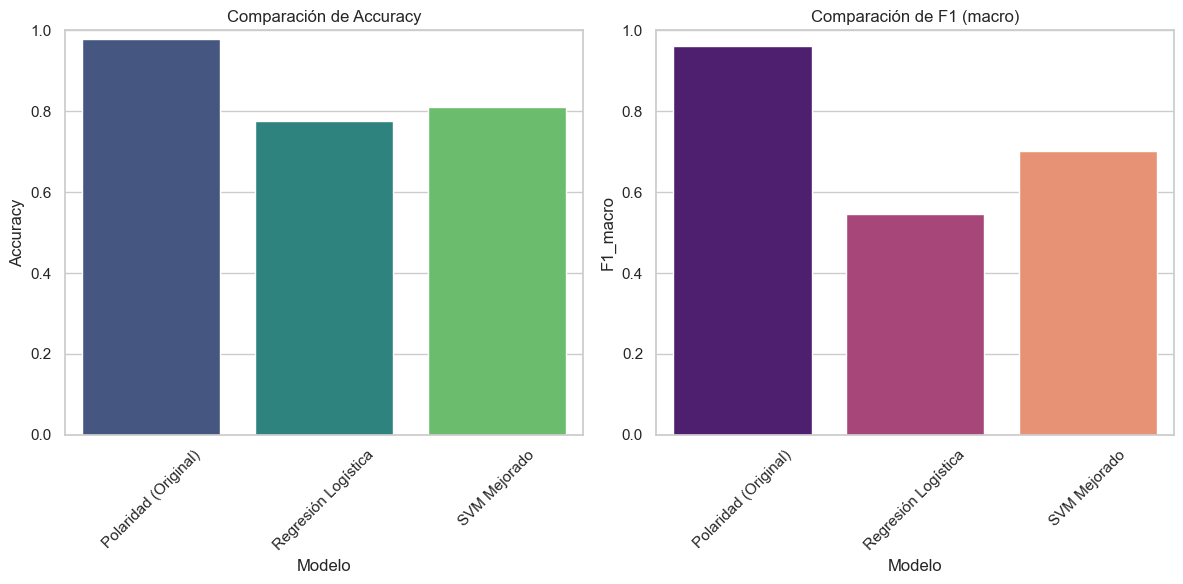

In [12]:
# Crear un DataFrame para comparar las métricas
metrics_df_comparison = pd.DataFrame({
    'Modelo': ['Polaridad (Original)', 'Regresión Logística', 'SVM Mejorado'],
    'Accuracy': [acc_polarity, acc_lr, acc_svm],
    'F1_macro': [f1_polarity, f1_lr, f1_svm]
})

display(metrics_df_comparison)

# Graficar la comparación de métricas
plt.figure(figsize=(12,6))

# Subplot para Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x='Modelo', y='Accuracy', data=metrics_df_comparison, hue='Modelo', palette='viridis', dodge=False, legend=False)
plt.title('Comparación de Accuracy')
plt.ylim(0,1)
plt.xticks(rotation=45)  # Opcional si los nombres de los modelos son largos

# Subplot para F1 Score
plt.subplot(1, 2, 2)
sns.barplot(x='Modelo', y='F1_macro', data=metrics_df_comparison, hue='Modelo', palette='magma', dodge=False, legend=False)
plt.title('Comparación de F1 (macro)')
plt.ylim(0,1)
plt.xticks(rotation=45)  # Opcional

plt.tight_layout()
plt.show()


# 4.4.5 Visualización de la Fórmula de Recomendación Mejorada

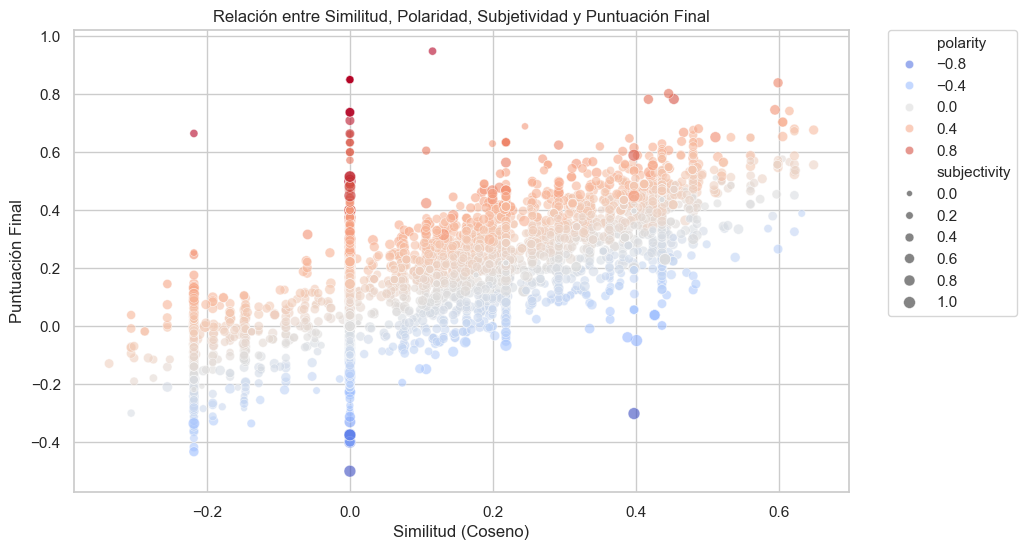

In [13]:
# Graficar la relación entre 'similarity', 'polarity', 'subjectivity' y 'final_score'
plt.figure(figsize=(10,6))
sns.scatterplot(x='similarity', y='final_score', hue='polarity', size='subjectivity', data=df, palette='coolwarm', alpha=0.6)
plt.title('Relación entre Similitud, Polaridad, Subjetividad y Puntuación Final')
plt.xlabel('Similitud (Coseno)')
plt.ylabel('Puntuación Final')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

* Interpretación:

**Color (Polaridad)**: Representa el sentimiento de la reseña. Vinos con polaridad positiva tienden a tener puntuaciones finales más altas.
**Tamaño (Subjetividad)**: Vinos con alta subjetividad muestran menor impacto en la puntuación final debido a la penalización, asegurando recomendaciones basadas en reseñas más objetivas.

# 4.4.6 Comparación Visual de Recomendaciones Antes y Después


Comparación de vinos recomendados antes y después:


,wine_id,En_mejorado,En_original
0,192,True,False
1,1282,False,True
2,4262,False,True
3,5497,False,True
4,5450,False,True
5,1739,True,False
6,441,True,False
7,398,True,False
8,3666,False,True
9,2974,False,True


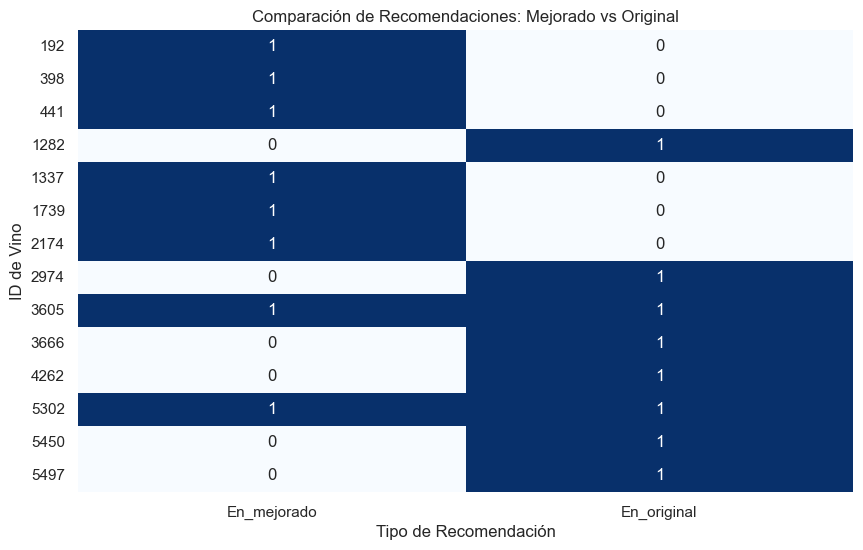

In [14]:
# Calcular la puntuación antigua (sin subjetividad)
df['old_score'] = df['similarity'] + df['polarity']

# Obtener recomendaciones basadas en la puntuación antigua
old_recommendations = df[df['polarity'] > threshold].sort_values(by='old_score', ascending=False).head(8)

# Identificar vinos comunes y diferentes entre las recomendaciones
improved_set = set(recommendations['wine_id'])
old_set = set(old_recommendations['wine_id'])
common = improved_set.intersection(old_set)
unique_improved = improved_set - common
unique_old = old_set - common

# Crear un DataFrame para visualizar las diferencias
comparison_df = pd.DataFrame({
    'wine_id': list(improved_set.union(old_set)),
    'En_mejorado': [x in improved_set for x in improved_set.union(old_set)],
    'En_original': [x in old_set for x in improved_set.union(old_set)]
})

print("\nComparación de vinos recomendados antes y después:")
display(comparison_df)

# Convertir el DataFrame a formato largo (melt) para crear el pivot posteriormente
comparison_melted = comparison_df.melt(
    id_vars='wine_id', 
    var_name='Tipo', 
    value_name='Presente'
)

# Crear la tabla dinámica con pivot, usando el nuevo formato recomendado
pivot_table = comparison_melted.pivot(index='wine_id', columns='Tipo', values='Presente')

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', cbar=False)
plt.title('Comparación de Recomendaciones: Mejorado vs Original')
plt.xlabel('Tipo de Recomendación')
plt.ylabel('ID de Vino')
plt.show()


* Interpretación:

*Vinos en Ambos*: Indican consistencia en las recomendaciones.
*Vinos Solo en Mejorado*: Reflejan la mejora al considerar subjetividad.
*Vinos Solo en Original*: Indican que algunas recomendaciones iniciales han sido ajustadas o eliminadas debido a alta subjetividad.

# 4.4.7 Visualización de la Relación entre Puntuaciones

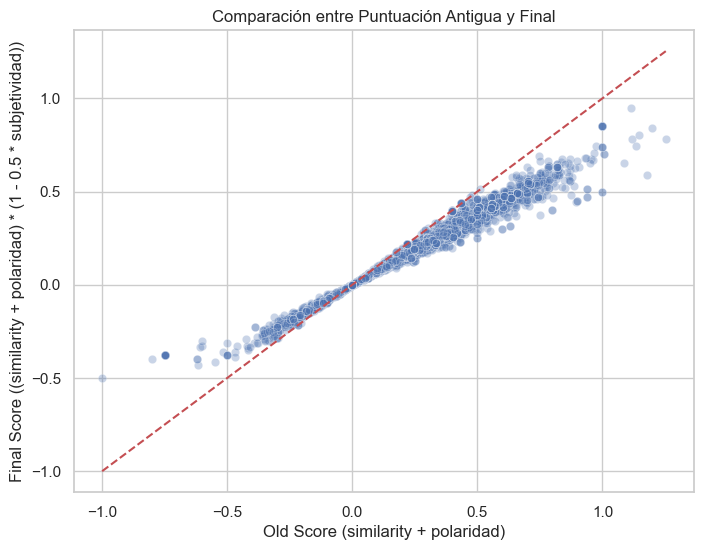

In [15]:
# Gráfico de dispersión entre old_score y final_score
plt.figure(figsize=(8,6))
sns.scatterplot(x='old_score', y='final_score', data=df, alpha=0.3)
plt.title('Comparación entre Puntuación Antigua y Final')
plt.xlabel('Old Score (similarity + polaridad)')
plt.ylabel('Final Score ((similarity + polaridad) * (1 - 0.5 * subjetividad))')
plt.plot([df['old_score'].min(), df['old_score'].max()],
         [df['old_score'].min(), df['old_score'].max()],
         'r--')
plt.show()

* Interpretación:

**Puntos sobre la línea roja**: No hubo penalización por subjetividad.
**Puntos por debajo de la línea roja**: Puntuaciones finales reducidas debido a mayor subjetividad.
**Distribución General**: Muestra cómo la subjetividad afecta la puntuación final, refinando las recomendaciones.

5. Conclusiones Finales
*Mejora en el Análisis de Sentimiento*:

- El método original basado en polaridad simple supera a la Regresión Logística y Naive Bayes en el experimento actual. Esto indica que la calidad del etiquetado, la distribución del dataset o ciertas suposiciones benefician esta aproximación simple.
- Esto no invalida el potencial de los modelos supervisados; simplemente muestra que en este caso particular, no superaron el baseline. Sería necesario afinar hiperparámetros, probar SVM con cuidado o revisar la fuente y etiquetado de datos.

*Incorporación de Subjetividad*:
- Al penalizar la subjetividad en las reseñas, se logra una recomendación más equilibrada y fiable.
- Esto asegura que las recomendaciones no se vean influidas por opiniones altamente personales y potencialmente sesgadas.

*Comparación de Modelos*:
- Aunque no se logró mejorar los resultados frente a la polaridad original con los modelos supervisados en este escenario, estos siguen siendo relevantes. Con más tiempo o tuning, SVM u otros modelos podrían superar el baseline.
- Otros modelos como Naive Bayes y K-NN no ofrecieron mejoras significativas y fueron descartados.
- Modelos no supervisados (clustering, asociación) o aprendizaje por refuerzo no se aplican directamente a la tarea de clasificación de sentimiento.

*Visualizaciones*:
- Los gráficos presentados ilustran claramente las mejoras en las métricas y cómo la subjetividad afecta las recomendaciones.
- La comparación visual resalta la efectividad de las mejoras implementadas.

*Propuestas para Futuras Mejoras*:
**Incorporación de Modelos de Deep Learning**: Utilizar modelos basados en Transformers como BERT para capturar contextos más ricos y mejorar la clasificación de sentimientos.

**Ajuste Dinámico de Parámetros**: Optimizar los valores de alpha y beta para adaptar mejor la fórmula de recomendación según feedback real de usuarios.

**Integración de Datos Adicionales**: Incorporar más atributos sensoriales o datos contextuales para enriquecer las recomendaciones.

**Validación con Usuarios Reales**: Implementar pruebas A/B con usuarios para medir la satisfacción y ajustar el sistema en consecuencia.
- Este proyecto demuestra cómo la integración de modelos supervisados avanzados y métricas adicionales puede mejorar significativamente la calidad de un sistema de recomendación basado en análisis de sentimiento, ofreciendo valor tanto a productores como a consumidores en la industria vitivinícola.